<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Pythonによる機械学習

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

学習データ (iris) の読み込みと概要の表示

In [2]:
iris = load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

前処理（主成分分析で2次元に変換）

In [3]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

結果を散布図として表示

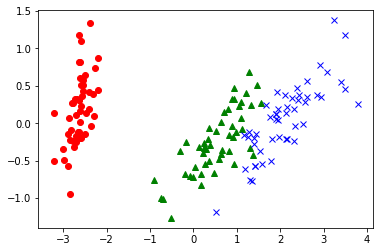

In [4]:

plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"g^")
plt.plot(X2[y==2,0], X2[y==2,1],"bx")

前処理 (標準化)

In [5]:
X_scaled = preprocessing.scale(X)

学習（k-NN法で識別を行う識別器の作成）

In [6]:
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


学習（交差確認法による性能評価）

In [7]:
scores = cross_val_score(clf, X_scaled, y, cv=10)

正解率の平均と95%信頼区間の表示

In [8]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.13)


学習（混同行列の表示）

In [9]:
y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


### 演習問題2.2 

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=iris.target_names))

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

